In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# from sklearn import set_config
# set_config(display='diagram')

#from dspipes import Pipelines, TextPipeline
from Experiment import Experiment
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Initiate experiment uci_label_pipe_0-i-2000-time-24-08-2021-19-41-38
Running label noise experiment
Successfully created the directory ./results/uci_label_pipe_0/i-2000-time-24-08-2021-19-41-38/label/
True
Pipeline(steps=[('identity',
                 FunctionTransformer(func=<function process_pipe_condknn.<locals>.identity at 0x000001F4017EDA60>))])
KNN_Shapley
done!
condknn time:  566.4895592
Pipeline(steps=[('identity',
                 FunctionTransformer(func=<function process_pipe_condknn.<locals>.identity at 0x000001F4017EDA60>))])
KNN_Shapley
done!
condknn time:  589.3217836999997


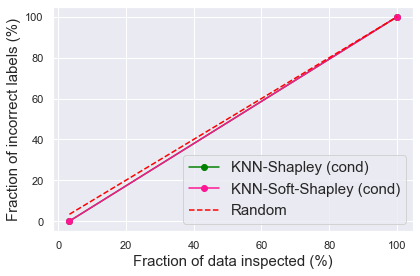

(pid=12280) 24 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=18352) 9 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=15692) 15 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=15692) 21 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=15692) 24 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=10504) 15 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=10504) 30 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=12252) 6 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=3384) 18 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=3384) 18 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=9760) 3 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=9760) 27 out of 30 evaluation iterations for KNN-Shapley (cond).
(pid=20500) 6 out of 30 evaluation iterations for KNN-Soft-Shapley (cond).
(pid=20500) 21 out of 30 evaluation iterations for KNN-

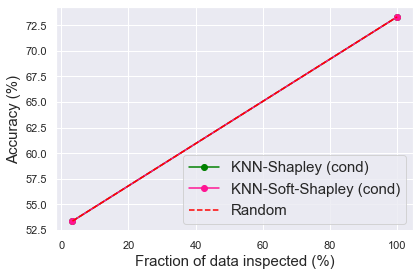

Running poisoning experiment
Successfully created the directory ./results/uci_label_pipe_0/i-2000-time-24-08-2021-19-41-38/poisoning/
(12000, 28, 28)
Pipeline(steps=[('identity',
                 FunctionTransformer(func=<function process_pipe_condknn.<locals>.identity at 0x000001F4017F2670>))])
KNN_Shapley


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [26]:
for i in range(0,7):
    name = f'pipe_{i}'
    model = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    exp_name = f'uci_label_{name}'
    exp = Experiment(exp_name, model, dataset_name="UCI")
    if i == 7: 
        exp.run(iterations=2000, run_label=True, run_poisoning=False, run_fairness=False, ray=True, flatten=False, truncated=True)
    else:
        exp.run(iterations=2000, run_label=True, run_poisoning=True, run_fairness=True, ray=True, truncated=True)